## Apply linear regression on any random dataset using Pytorch.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)
x = np.random.rand(100,1)
y = x*2 + 1 + 0.5*np.random.rand(100,1)

In [12]:
x_tensor = torch.tensor(x,dtype=torch.float32)
y_tensor = torch.tensor(y,dtype=torch.float32)

In [13]:
x[0], x_tensor[0]

(array([0.5488135]), tensor([0.5488]))

In [17]:
class linear_reg(nn.Module):
    def __init__(self):
        super(linear_reg,self).__init__()
        self.linear=nn.Linear(1,1)
    def forward(self,x):
        return self.linear(x)

In [20]:
model = linear_reg()

In [29]:
optimizer = optim.SGD(model.parameters(),lr=0.01)
epochs = 1000
for i in range(epochs):
    output = model(x_tensor)
    loss = nn.MSELoss()(output,y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 ==0:
        print('Epoch : ',(i+1)/100,' Loss : ',loss.item())

Epoch :  1.0  Loss :  0.08460592478513718
Epoch :  2.0  Loss :  0.025690792128443718
Epoch :  3.0  Loss :  0.023842627182602882
Epoch :  4.0  Loss :  0.022714555263519287
Epoch :  5.0  Loss :  0.021853912621736526
Epoch :  6.0  Loss :  0.02119586057960987
Epoch :  7.0  Loss :  0.02069270797073841
Epoch :  8.0  Loss :  0.02030797488987446
Epoch :  9.0  Loss :  0.020013824105262756
Epoch :  10.0  Loss :  0.019788898527622223


In [30]:
pred = model(x_tensor).detach().numpy()

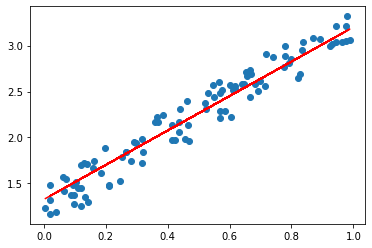

In [31]:
plt.scatter(x,y)
plt.plot(x,pred,c='r')